## Load Dataset

In [2]:
import os
import pandas as pd
from scipy.stats import zscore
import matplotlib as matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import squarify
import plotly.express as px

In [3]:
df = pd.read_csv("data\Occupancy.csv")
df.head().T

,0,1,2,3,4
date,2015-02-02 14:19:00,2015-02-02 14:19:59,2015-02-02 14:21:00,2015-02-02 14:22:00,2015-02-02 14:23:00
Temperature,23.7,23.718,23.73,23.7225,23.754
Humidity,26.272,26.29,26.23,26.125,26.2
Light,585.2,578.4,572.666667,493.75,488.6
CO2,749.2,760.4,769.666667,774.75,779.0
HumidityRatio,0.004764,0.004773,0.004765,0.004744,0.004767
Occupancy,1,1,1,1,1


# Check columns in dataset

In [4]:
df.info()  #convert date to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [5]:
df.shape

(20560, 7)

# Cleaning the dataset

### Check for missing values

In [6]:
df.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

### Check for duplicates

In [ ]:
df['date'].duplicated().sum() 

np.int64(0)

# Look at basic statistics

In [7]:
df.describe() #Look again at the table and ask questions (Temperature mean, Occupancy mean, etc.)
#Check the right numbers for Humidity, Light, CO2, Temperature

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


### Select only float-type columns (continuous numeric data)

In [8]:
numeric_cols = df.select_dtypes(include=['float32', 'float64']).columns
numeric_cols #dont loop over them, write manually for each column

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')

### Check outliers

In [19]:
# Lists to collect outliers as DataFrames for each method
iqr_outliers_all = []
zscore_outliers_all = []

for col in numeric_cols:
    print(f"\nColumn: {col}")

    # IQR Method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"  🔹 IQR outliers: {len(iqr_outliers)}")
    if not iqr_outliers.empty:
        temp = iqr_outliers[[col]].copy()
        temp["column"] = col
        temp["method"] = "IQR"
        iqr_outliers_all.append(temp)

# Combine all outliers into unified DataFrames
df_iqr_outliers = pd.concat(iqr_outliers_all, ignore_index=True) if iqr_outliers_all else pd.DataFrame()
df_zscore_outliers = pd.concat(zscore_outliers_all, ignore_index=True) if zscore_outliers_all else pd.DataFrame()


Column: Temperature
  🔹 IQR outliers: 519

Column: Humidity
  🔹 IQR outliers: 0

Column: Light
  🔹 IQR outliers: 183

Column: CO2
  🔹 IQR outliers: 1449

Column: HumidityRatio
  🔹 IQR outliers: 0


### Look what columns are containning outliers

In [ ]:
print(f"Columns with IQR outliers: {df_iqr_outliers.column.unique()}")

Columns with IQR outliers: ['Temperature' 'Light' 'CO2']
Columns with zscore outliers: ['Temperature' 'Light' 'CO2']


### Combine them

In [14]:
iqr_outlier_columns = list(df_iqr_outliers["column"].unique())
zscore_outlier_columns = list(df_zscore_outliers["column"].unique())

# Columns common to both methods
outlier_columns = list(set(iqr_outlier_columns) & set(zscore_outlier_columns))
outlier_columns

['Light', 'Temperature', 'CO2']

### Visualize columns with outliers (Box-plot, Violin-plot)

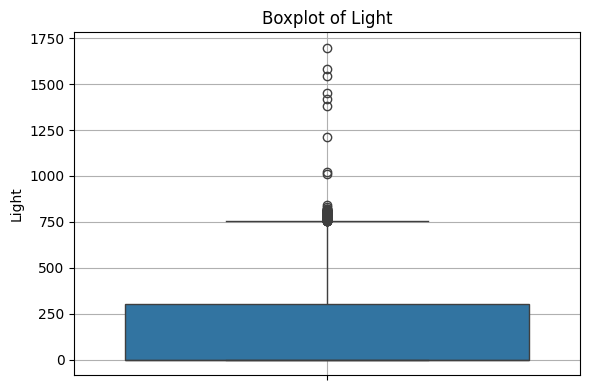

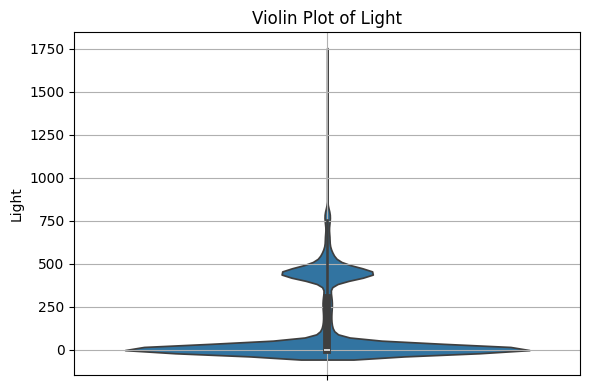

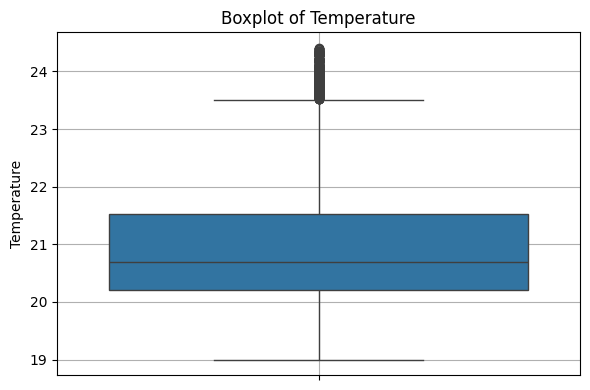

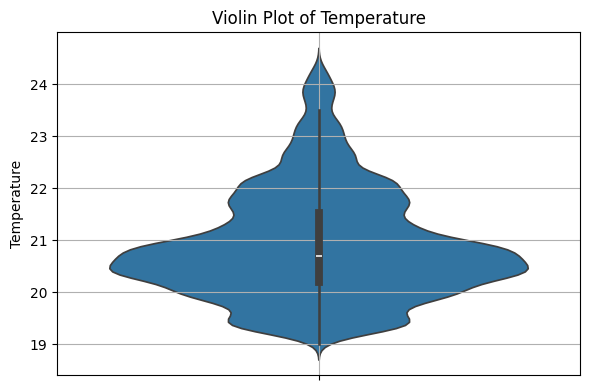

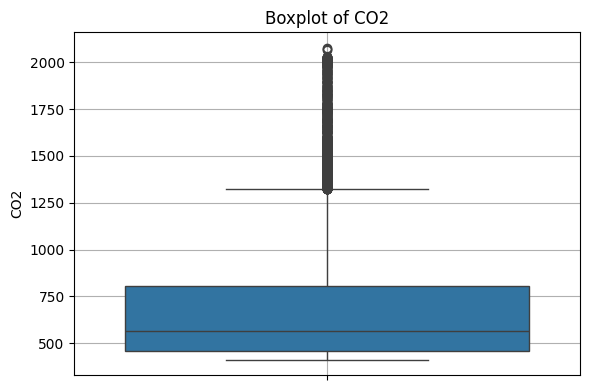

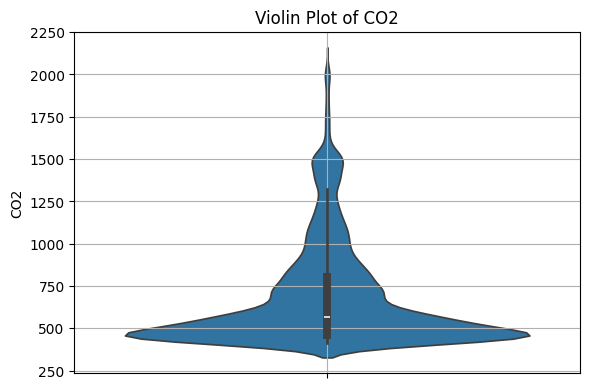

In [15]:
for col in outlier_columns:
    # --- Boxplot ---
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Violin Plot ---
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=df, y=col)
    plt.title(f'Violin Plot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Looking at different correlations

### Occupancy Distribution

In [23]:
import plotly.express as px

fig = px.histogram(
    df,
    x='Occupancy',
    nbins=2,
    histnorm='percent',
    title='Occupancy Distribution (Percentage)'
)
fig.update_layout(
    xaxis_title='Occupancy',
    yaxis_title='Percentage',
    bargap=0.2
)
fig.show()


### Occupancy X Temprature

In [27]:
import plotly.express as px

fig = px.box(
    df,
    x='Occupancy',
    y='Temperature',
    title='Temperature Distribution by Occupancy Status',
    labels={'Occupancy': 'Occupancy (0 = No, 1 = Yes)', 'Temperature': 'Temperature (°C)'}
)
fig.show()


### Compare occupancy for day-off or working day


In [42]:
import pandas as pd
import plotly.express as px

# Ensure datetime format and extract hour
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day_name()

# Filter for Sunday and Monday
df_filtered = df[df['day'].isin(['Sunday', 'Monday'])]

# Group by day and hour, calculate average occupancy
occupancy_by_hour = df_filtered.groupby(['day', 'hour'])['Occupancy'].mean().reset_index()

# Plot
fig = px.line(
    occupancy_by_hour,
    x='hour',
    y='Occupancy',
    color='day',
    title='Average Occupancy by Hour: Sunday vs. Monday',
    markers=True,
    labels={'hour': 'Hour of Day', 'Occupancy': 'Occupancy Rate'}
)

fig.update_layout(
    xaxis=dict(dtick=1),
    yaxis=dict(range=[0, 1]),
    template='plotly_white'
)

fig.show()


### Conclusion: Sunday is day - off

In [32]:
import pandas as pd
import plotly.graph_objects as go

# Convert 'date' to datetime and extract hour
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour

# Group by hour
hourly_stats = df.groupby('hour').agg({
    'Temperature': 'mean',
    'Occupancy': 'mean'  # average occupancy per hour (0 to 1)
}).reset_index()

# Create the figure
fig = go.Figure()

# Add temperature trace (left y-axis)
fig.add_trace(go.Scatter(
    x=hourly_stats['hour'],
    y=hourly_stats['Temperature'],
    name='Avg Temperature (°C)',
    mode='lines+markers',
    line=dict(color='red'),
    yaxis='y1'
))

# Add occupancy trace (right y-axis)
fig.add_trace(go.Bar(
    x=hourly_stats['hour'],
    y=hourly_stats['Occupancy'],
    name='Avg Occupancy',
    opacity=0.3,
    marker_color='blue',
    yaxis='y2'
))

# Update layout
fig.update_layout(
    title='Average Temperature and Occupancy by Hour of Day',
    xaxis=dict(title='Hour of Day', dtick=1),
    yaxis=dict(
        title='Avg Temperature (°C)',
        side='left',
        showgrid=False
    ),
    yaxis2=dict(
        title='Avg Occupancy',
        side='right',
        overlaying='y',
        range=[0, 1],
        showgrid=False
    ),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()


### Compare temprature for a day off and a working day

In [43]:
# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Extract hour
df['hour'] = df['date'].dt.hour

# Filter for Sunday and hours between 8 and 17 inclusive
df_sunday_workhours = df[
    (df['date'].dt.day_name() == 'Sunday') &
    (df['hour'] >= 8) &
    (df['hour'] <= 17)
]

# Calculate average temperature
average_temp_sunday_workhours = df_sunday_workhours['Temperature'].mean()
print(f"🌡️ Average Temperature on Sunday (08:00–17:00): {average_temp_sunday_workhours:.2f} °C")


🌡️ Average Temperature on Sunday (08:00–17:00): 20.67 °C


In [44]:
# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Extract hour
df['hour'] = df['date'].dt.hour

# Filter for Monday and hours between 8 and 17 inclusive
df_monday_workhours = df[
    (df['date'].dt.day_name() == 'Monday') &
    (df['hour'] >= 8) &
    (df['hour'] <= 17)
]

# Calculate average temperature
average_temp_monday_workhours = df_monday_workhours['Temperature'].mean()
print(f"🌡️ Average Temperature on Monday (08:00–17:00): {average_temp_monday_workhours:.2f} °C")


🌡️ Average Temperature on Monday (08:00–17:00): 21.62 °C


## Average CO₂ and Occupancy by Hour of Day

In [45]:
import pandas as pd
import plotly.graph_objects as go

# Convert 'date' to datetime and extract hour
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour

# Group by hour
hourly_stats = df.groupby('hour').agg({
    'CO2': 'mean',
    'Occupancy': 'mean'  # average occupancy per hour (0 to 1)
}).reset_index()

# Create the figure
fig = go.Figure()

# Add CO2 trace (left y-axis)
fig.add_trace(go.Scatter(
    x=hourly_stats['hour'],
    y=hourly_stats['CO2'],
    name='Avg CO₂ (ppm)',
    mode='lines+markers',
    line=dict(color='green'),
    yaxis='y1'
))

# Add occupancy trace (right y-axis)
fig.add_trace(go.Bar(
    x=hourly_stats['hour'],
    y=hourly_stats['Occupancy'],
    name='Avg Occupancy',
    opacity=0.3,
    marker_color='blue',
    yaxis='y2'
))

# Update layout
fig.update_layout(
    title='Average CO₂ and Occupancy by Hour of Day',
    xaxis=dict(title='Hour of Day', dtick=1),
    yaxis=dict(
        title='Avg CO₂ (ppm)',
        side='left',
        showgrid=False
    ),
    yaxis2=dict(
        title='Avg Occupancy',
        side='right',
        overlaying='y',
        range=[0, 1],
        showgrid=False
    ),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()


### Compare temprature for a day off and a working day

In [46]:
# Filter work hours for Sunday
df_sun_work = df[
    (df['day'] == 'Sunday') &
    (df['hour'] >= 8) & (df['hour'] <= 17)
]
avg_co2_sun = df_sun_work['CO2'].mean()
print(f"🌿 Average CO₂ on Sunday (08:00–17:00): {avg_co2_sun:.2f} ppm")

# Filter work hours for Monday
df_mon_work = df[
    (df['day'] == 'Monday') &
    (df['hour'] >= 8) & (df['hour'] <= 17)
]
avg_co2_mon = df_mon_work['CO2'].mean()
print(f"🌿 Average CO₂ on Monday (08:00–17:00): {avg_co2_mon:.2f} ppm")


🌿 Average CO₂ on Sunday (08:00–17:00): 536.98 ppm
🌿 Average CO₂ on Monday (08:00–17:00): 1110.60 ppm


## Humidity and Occupancy by Hour

In [47]:
# Group by hour for Humidity and Occupancy
hourly_humidity = df.groupby('hour').agg({
    'Humidity': 'mean',
    'Occupancy': 'mean'
}).reset_index()

# Create figure
fig = go.Figure()

# Add Humidity trace (left Y-axis)
fig.add_trace(go.Scatter(
    x=hourly_humidity['hour'],
    y=hourly_humidity['Humidity'],
    name='Avg Humidity (%)',
    mode='lines+markers',
    line=dict(color='orange'),
    yaxis='y1'
))

# Add Occupancy trace (right Y-axis)
fig.add_trace(go.Bar(
    x=hourly_humidity['hour'],
    y=hourly_humidity['Occupancy'],
    name='Avg Occupancy',
    opacity=0.3,
    marker_color='blue',
    yaxis='y2'
))

# Layout
fig.update_layout(
    title='Average Humidity and Occupancy by Hour of Day',
    xaxis=dict(title='Hour of Day', dtick=1),
    yaxis=dict(title='Avg Humidity (%)', side='left'),
    yaxis2=dict(title='Avg Occupancy', side='right', overlaying='y', range=[0, 1]),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()


## HumidityRatio and Occupancy by Hour

In [48]:
# Group by hour for HumidityRatio and Occupancy
hourly_ratio = df.groupby('hour').agg({
    'HumidityRatio': 'mean',
    'Occupancy': 'mean'
}).reset_index()

# Create figure
fig = go.Figure()

# Add HumidityRatio trace (left Y-axis)
fig.add_trace(go.Scatter(
    x=hourly_ratio['hour'],
    y=hourly_ratio['HumidityRatio'],
    name='Avg Humidity Ratio (kg/kg)',
    mode='lines+markers',
    line=dict(color='purple'),
    yaxis='y1'
))

# Add Occupancy trace (right Y-axis)
fig.add_trace(go.Bar(
    x=hourly_ratio['hour'],
    y=hourly_ratio['Occupancy'],
    name='Avg Occupancy',
    opacity=0.3,
    marker_color='blue',
    yaxis='y2'
))

# Layout
fig.update_layout(
    title='Average Humidity Ratio and Occupancy by Hour of Day',
    xaxis=dict(title='Hour of Day', dtick=1),
    yaxis=dict(title='Avg Humidity Ratio (kg/kg)', side='left'),
    yaxis2=dict(title='Avg Occupancy', side='right', overlaying='y', range=[0, 1]),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()


###  Environmental Variables vs. Occupancy (Pearson correlation)

In [16]:
# Select only numeric columns
numeric_df = df[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']]

# Calculate Pearson correlation matrix
pearson_corr = numeric_df.corr(method='pearson')

# Correlation with Occupancy 
occupancy_corr = pearson_corr['Occupancy'].drop('Occupancy').reset_index()
occupancy_corr.columns = ['Feature', 'correlation']

# Bar plot using Plotly
fig = px.bar(
    occupancy_corr,
    x='Feature',
    y='correlation',
    color='correlation',
    color_continuous_scale='RdBu',
    title='Pearson Correlation with Occupancy',
    text=occupancy_corr['correlation'].round(2)
)
fig.update_layout(yaxis_title='Correlation Coefficient', coloraxis_colorbar=dict(title='Correlation'))
fig.show()


### Look at range of time in 'date' column

In [17]:
# Convert to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Check min and max timestamps
start_date = df['date'].min()
end_date = df['date'].max()

print(f"📅 Data ranges from: {start_date} to {end_date}")
print(f"🕒 Total duration: {end_date - start_date}")


📅 Data ranges from: 2015-02-02 14:19:00 to 2015-02-18 09:19:00
🕒 Total duration: 15 days 19:00:00


In [18]:
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20560 entries, 0 to 20559
Series name: date
Non-Null Count  Dtype         
--------------  -----         
20560 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 160.8 KB


### Correlation between time and light throughout the day (light mean x hour of day)

In [33]:
import pandas as pd
import plotly.graph_objects as go

# Ensure datetime format and extract hour
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour

# Group by hour and calculate mean Light and Occupancy
hourly_stats = df.groupby('hour').agg({
    'Light': 'mean',
    'Occupancy': 'mean'  # 0 to 1 — shows how often the space was occupied each hour
}).reset_index()

# Create figure
fig = go.Figure()

# Add Occupancy (background area)
fig.add_trace(go.Bar(
    x=hourly_stats['hour'],
    y=hourly_stats['Occupancy'],
    name='Occupancy Rate',
    opacity=0.3,
    marker_color='lightblue',
    yaxis='y2'
))

# Add Light (line plot)
fig.add_trace(go.Scatter(
    x=hourly_stats['hour'],
    y=hourly_stats['Light'],
    name='Avg Light',
    mode='lines+markers',
    line=dict(color='orange'),
    yaxis='y1'
))

# Update layout with two y-axes
fig.update_layout(
    title='Average Light Levels with Occupancy by Hour of Day',
    xaxis=dict(title='Hour of Day', dtick=1),
    yaxis=dict(
        title='Average Light',
        side='left'
    ),
    yaxis2=dict(
        title='Occupancy Rate',
        overlaying='y',
        side='right',
        range=[0, 1],
        showgrid=False
    ),
    template='plotly_white',
    legend=dict(x=0.01, y=0.99)
)

fig.show()


### Check for real Sunset distribution in europe

#### sunrise : 7-8 , sunset: 17-18

### Check Light distribution for a day off (sunday)

In [34]:
import pandas as pd
import plotly.express as px

# Ensure datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter for Sunday (weekday == 6 in pandas, or use .day_name())
df_sunday = df[df['date'].dt.day_name() == 'Sunday']

# Extract hour
df_sunday['hour'] = df_sunday['date'].dt.hour

# Group by hour and calculate average light
hourly_light_sunday = df_sunday.groupby('hour')['Light'].mean().reset_index()

# Plot
fig = px.line(
    hourly_light_sunday,
    x='hour',
    y='Light',
    title='Average Light Levels by Hour on Sunday',
    markers=True
)
fig.update_layout(
    xaxis_title='Hour of Day',
    yaxis_title='Average Light',
    xaxis=dict(dtick=1),
    template='plotly_white'
)
fig.show()


C:\Users\inbal\AppData\Local\Temp\ipykernel_16244\3338015965.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
average_light_sunday = df_sunday['Light'].mean()
print(f"🌞 Average Light on Sunday: {average_light_sunday:.2f}")


🌞 Average Light on Sunday: 38.74


In [39]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter only Monday
df_monday = df[df['date'].dt.day_name() == 'Monday']

# Calculate average light on Monday
average_light_monday = df_monday['Light'].mean()
print(f"🌞 Average Light on Monday: {average_light_monday:.2f}")


🌞 Average Light on Monday: 172.32


### Conclusion: The light is mostly not natural

### Density Plot Comparison (CO2 x Occupancy)

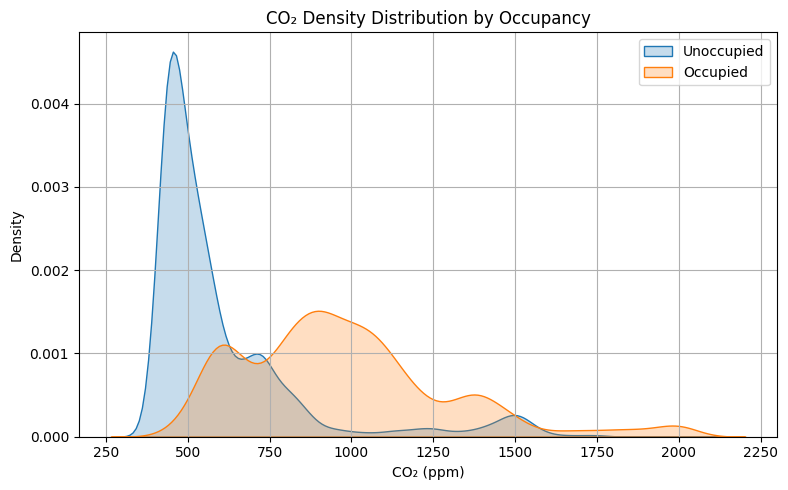

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df[df['Occupancy'] == 0], x='CO2', label='Unoccupied', fill=True)
sns.kdeplot(data=df[df['Occupancy'] == 1], x='CO2', label='Occupied', fill=True)
plt.title('CO₂ Density Distribution by Occupancy')
plt.xlabel('CO₂ (ppm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### test if CO2 is skewed

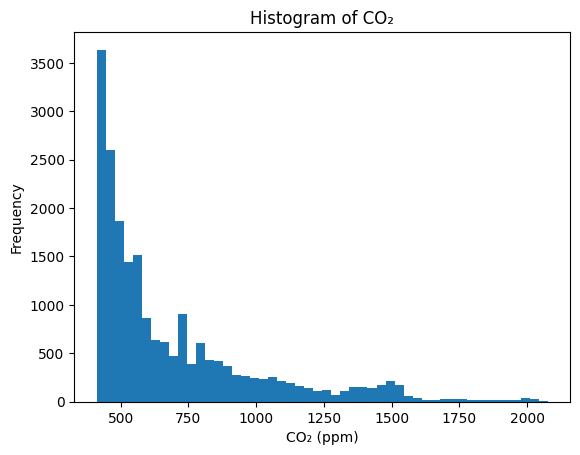

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['CO2'], bins=50)
plt.title("Histogram of CO₂")
plt.xlabel("CO₂ (ppm)")
plt.ylabel("Frequency")
plt.show()
